In [37]:
!pip install statsmodels


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [39]:
# clean time series data (already did this in the prophet but include just in case)
ts_data = df_super[
    (df_super['location_name'] == 'Sub-Saharan Africa') &
    (df_super['cause_name'] == 'Diarrheal diseases') &
    (df_super['measure_name'] == 'Deaths') &
    (df_super['metric_name'] == 'Rate')
][['year', 'val']]

# Set year as the index (needed for ARIMA)
ts_data.set_index('year', inplace=True)


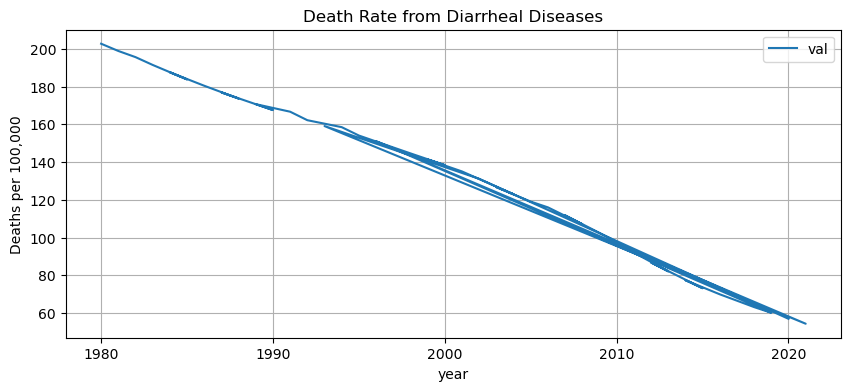

In [40]:
# Plot the time series
ts_data.plot(figsize=(10, 4), title='Death Rate from Diarrheal Diseases')
plt.ylabel('Deaths per 100,000')
plt.grid(True)
plt.show()


In [41]:
# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(ts_data, order=(1, 1, 1))
fit = model.fit()


/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/opt/miniconda3/envs/SP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


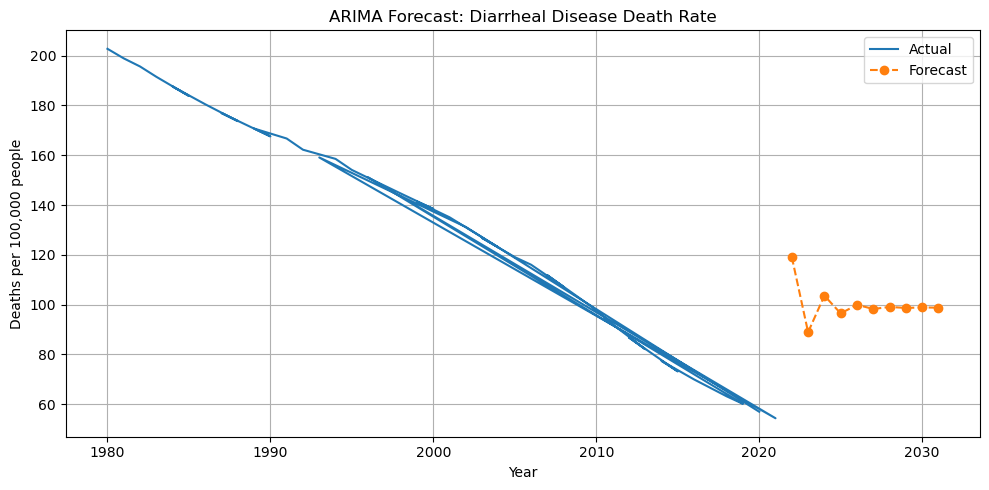

In [43]:
# Forecast 10 steps ahead
forecast = fit.forecast(steps=10)

# Create future years
future_years = list(range(ts_data.index.max() + 1, ts_data.index.max() + 11))

# Plot actual + forecast
plt.figure(figsize=(10, 5))
plt.plot(ts_data.index, ts_data['val'], label='Actual')
plt.plot(future_years, forecast, label='Forecast', linestyle='dashed', marker='o')
plt.title("ARIMA Forecast: Diarrheal Disease Death Rate")
plt.xlabel("Year")
plt.ylabel("Deaths per 100,000 people")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pmdarima'